In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import inspect
import datetime
from scipy.spatial import distance

In [2]:
import nolds

# Import sample data

Using S&P 500 data from Nov-2014 to Nov-2019. Will just use opening price to make life easy

[Source: Yahoo Finance](https://finance.yahoo.com/quote/%5EGSPC/history?period1=1415145600&period2=1572912000&interval=1d&filter=history&frequency=1d)

In [3]:
s_and_p_data = pd.read_csv('S&P5yrSample.csv', usecols = ['Date','Open'])

In [4]:
s_and_p_data['Date'] = pd.to_datetime(s_and_p_data['Date'])

In [5]:
s_and_p_data.head(5)

,Date,Open
0,2014-11-05,2015.290039
1,2014-11-06,2023.329956
2,2014-11-07,2032.359985
3,2014-11-10,2032.010010
4,2014-11-11,2038.199951


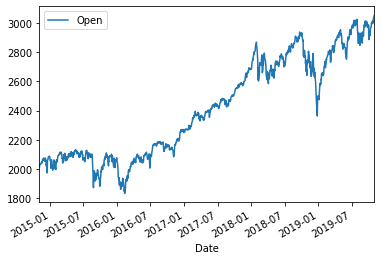

In [6]:
s_and_p_data.plot(x = 'Date', y = 'Open')

# Lyapunov exponent

Based on Rosenstein

## Get key values 


In [7]:
# Average time interval between readings 
delta_t = (s_and_p_data['Date'].max() - s_and_p_data['Date'].min()).total_seconds() / s_and_p_data.shape[0]

## Put data into phase space

Each row represents a different value for i

Each column is a different j value 

Total length of each column is M

Total width of matrix is m (embedding dimension)

Each column seperated by lag J 

First value of each row represents the original time series

In [8]:
def gen_phase_space_vector(row, J = 2, m = 10):
    i = row.name
    
    x_i = [] 

    for it in range(0, m):
        i_plus_j = i + J*it
        try:
            x_i.append((s_and_p_data.loc[s_and_p_data.index == i_plus_j]['Open'].item()))
        except:
            x_i.append(np.nan)
    return x_i

In [9]:
test_df = s_and_p_data.apply(gen_phase_space_vector, axis = 1, result_type = 'expand')

/Users/calumthompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: `item` has been deprecated and will be removed in a future version
  if __name__ == '__main__':


In [10]:
s_and_p_data.head(50)

,Date,Open
0,2014-11-05,2015.290039
1,2014-11-06,2023.329956
2,2014-11-07,2032.359985
3,2014-11-10,2032.010010
4,2014-11-11,2038.199951
5,2014-11-12,2037.750000
6,2014-11-13,2039.209961
7,2014-11-14,2039.739990
8,2014-11-17,2038.290039
9,2014-11-18,2041.479980


In [11]:
test_df.head(10)

,0,1,2,3,4,5,6,7,8,9
0,2015.290039,2032.359985,2038.199951,2039.209961,2038.290039,2051.159912,2057.459961,2070.149902,2074.780029,2053.770020
1,2023.329956,2032.010010,2037.750000,2039.739990,2041.479980,2045.869995,2065.070068,2067.360107,2065.780029,2067.449951
2,2032.359985,2038.199951,2039.209961,2038.290039,2051.159912,2057.459961,2070.149902,2074.780029,2053.770020,2073.639893
3,2032.010010,2037.750000,2039.739990,2041.479980,2045.869995,2065.070068,2067.360107,2065.780029,2067.449951,2072.780029
4,2038.199951,2039.209961,2038.290039,2051.159912,2057.459961,2070.149902,2074.780029,2053.770020,2073.639893,2074.840088
5,2037.750000,2039.739990,2041.479980,2045.869995,2065.070068,2067.360107,2065.780029,2067.449951,2072.780029,2056.550049
6,2039.209961,2038.290039,2051.159912,2057.459961,2070.149902,2074.780029,2053.770020,2073.639893,2074.840088,2058.860107
7,2039.739990,2041.479980,2045.869995,2065.070068,2067.360107,2065.780029,2067.449951,2072.780029,2056.550049,2027.920044
8,2038.290039,2051.159912,2057.459961,2070.149902,2074.780029,2053.770020,2073.639893,2074.840088,2058.860107,2030.359985
9,2041.479980,2045.869995,2065.070068,2067.360107,2065.780029,2067.449951,2072.780029,2056.550049,2027.920044,2005.030029


## Find initial distance to nearest neighbour

1. For first row (i = 0), search for the nearest neighbour - entry with the smallest Euclidian distance to the first value of the row. This is distance dj(0)

2. Calculate the distance between these points for the following rows to get dj(i). Resulting matrix of distances will be M rows long.

In [12]:
i_0 = test_df.iloc[0,:]
i_0

0    2015.290039
1    2032.359985
2    2038.199951
3    2039.209961
4    2038.290039
5    2051.159912
6    2057.459961
7    2070.149902
8    2074.780029
9    2053.770020
Name: 0, dtype: float64

In [13]:
def euc_distance (p1, p2):
    return distance.euclidean (p1,p2)

In [14]:
def find_nearest_neighbour(row, print_full_results = False):
    
    ref_point = (0,row.iloc[0])
    dists = []
    
    for point in row.iloc[1:].iteritems():
        dist = euc_distance(ref_point,point)
        dists.append([point[0],dist])
      
    if print_full_results == False:
        return pd.DataFrame(dists, columns= ['j', 'dist']).sort_values(by = 'dist', ascending= True).head(1)
    else:
        return pd.DataFrame(dists, columns= ['j', 'dist'])

In [15]:
NN_init = find_nearest_neighbour(i_0)

In [16]:
NN_init['j'][0]

1

## Find distance change for multiple i

For each row, get Euclidean distance between first value and value in cell equal where initial nearest neighbour was

In [17]:
NN_trajectory = test_df[[0, NN_init['j'][0]]]
NN_trajectory

,0,1
0,2015.290039,2032.359985
1,2023.329956,2032.010010
2,2032.359985,2038.199951
3,2032.010010,2037.750000
4,2038.199951,2039.209961
...,...,...
1252,3032.120117,3039.739990
1253,3035.389893,3046.899902
1254,3039.739990,3050.719971
1255,3046.899902,NaN


In [18]:
def get_distance_over_i(row):    
    p1 = (row.index[0] , row[0])
    p2 = (row.index[1] , row[1])
    try:
        return euc_distance(p1,p2)
    except:
        return np.nan

In [19]:
NN_trajectory['dist'] = NN_trajectory.apply(get_distance_over_i, axis =1 )

/Users/calumthompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Get Lyapunov exponent 

Lyapunov exponent $\lambda _{1}$ can be found from the following equation

$$ ln(d_{j}(i)) = \lambda _{1}i\Delta t + ln(d_{j}(0)) $$

In [20]:
NN_trajectory['ln_dj(i)'] = np.log(NN_trajectory['dist'])
NN_trajectory['i_dt'] = delta_t * NN_trajectory.index.values 
NN_trajectory

/Users/calumthompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/calumthompson/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,dist,ln_dj(i),i_dt
0,2015.290039,2032.359985,17.099212,2.839032,0.000000e+00
1,2023.329956,2032.010010,8.737467,2.167620,1.252353e+05
2,2032.359985,2038.199951,5.924964,1.779175,2.504706e+05
3,2032.010010,2037.750000,5.826447,1.762407,3.757060e+05
4,2038.199951,2039.209961,1.421309,0.351579,5.009413e+05
...,...,...,...,...,...
1252,3032.120117,3039.739990,7.685211,2.039298,1.567946e+08
1253,3035.389893,3046.899902,11.553368,2.446977,1.569199e+08
1254,3039.739990,3050.719971,11.025424,2.400204,1.570451e+08
1255,3046.899902,NaN,NaN,NaN,1.571703e+08


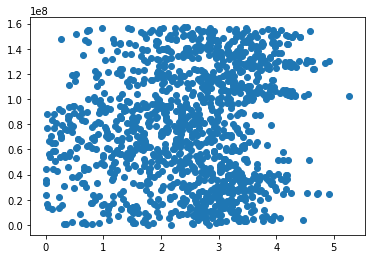

In [21]:
plt.scatter(NN_trajectory['ln_dj(i)'], NN_trajectory['i_dt'])

# Nolds


In [22]:
print(inspect.getsource(nolds.lyap_r))

def lyap_r(data, emb_dim=10, lag=None, min_tsep=None, tau=1, min_neighbors=20,
           trajectory_len=20, fit="RANSAC", debug_plot=False, debug_data=False,
           plot_file=None, fit_offset=0):
  """
  Estimates the largest Lyapunov exponent using the algorithm of Rosenstein
  et al. [lr_1]_.

  Explanation of Lyapunov exponents:
    See lyap_e.

  Explanation of the algorithm:
    The algorithm of Rosenstein et al. is only able to recover the largest
    Lyapunov exponent, but behaves rather robust to parameter choices.

    The idea for the algorithm relates closely to the definition of Lyapunov
    exponents. First, the dynamics of the data are reconstructed using a delay
    embedding method with a lag, such that each value x_i of the data is mapped
    to the vector

    X_i = [x_i, x_(i+lag), x_(i+2*lag), ..., x_(i+(emb_dim-1) * lag)]

    For each such vector X_i, we find the closest neighbor X_j using the
    euclidean distance. We know that as we follow the trajectories